Accuracy: 0.9783989834815756


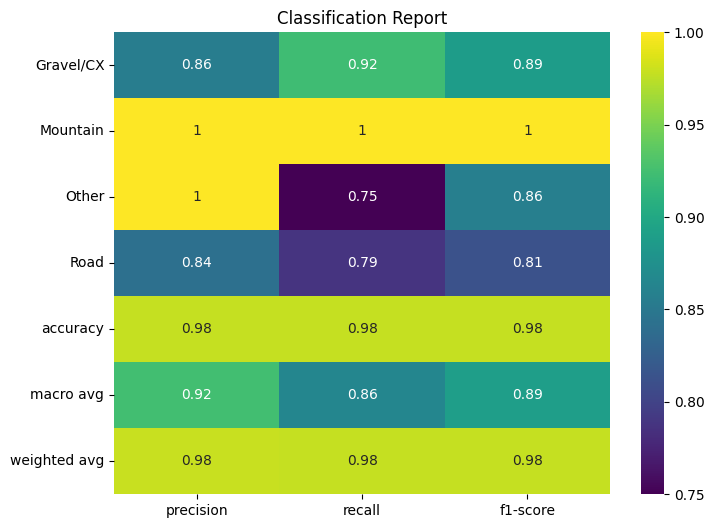

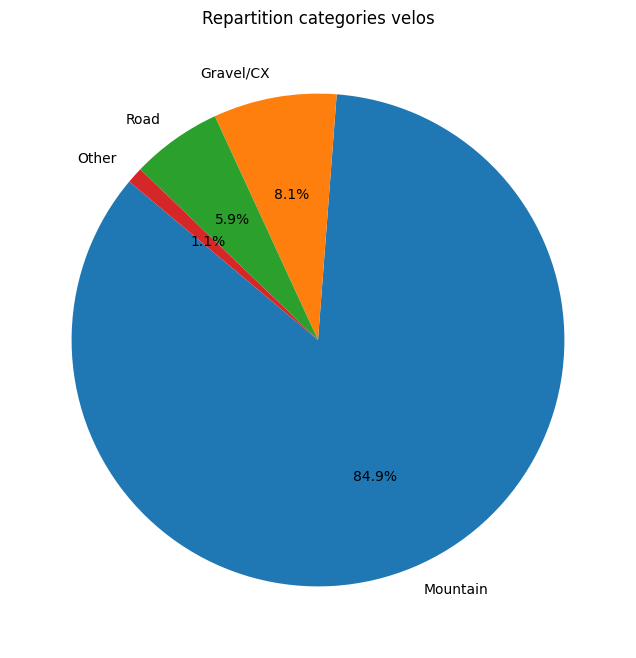

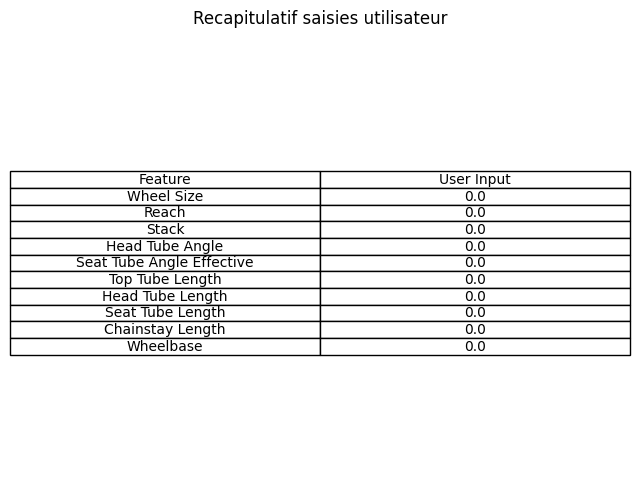

Predicted Category 1: ['Mountain']


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('Geo/geometrics.mtb-news.de.csv', on_bad_lines="skip")
colonnesTRI = ['Wheel Size', 'Reach', 'Stack', 'Head Tube Angle',
              'Seat Tube Angle Effective', 'Top Tube Length', 'Head Tube Length',
              'Seat Tube Length', 'Chainstay Length', 'Wheelbase', 'Category']

dfClean = df[colonnesTRI].dropna()
X = dfClean.drop('Category', axis=1)
y = dfClean['Category']
X_encoded = pd.get_dummies(X, drop_first=True)
X = pd.concat([X.drop(X.select_dtypes(exclude=['number']).columns, axis=1), X_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69, stratify=y)
model = RandomForestClassifier(random_state=69)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Heatmap rapport de classification
classification_report_dict = classification_report(y_test, predictions, output_dict=True)
class_report_df = pd.DataFrame.from_dict(classification_report_dict).drop(index='support')
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.T, annot=True, cmap='viridis')
plt.title('Classification Report')
plt.show()

# CrÃ©er un graphique camembert
category_counts = dfClean['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Repartition categories velos')
plt.show()


wheelSize = float(input("Wheel Size : "))
reach = float(input("Reach : "))
stack = float(input("Stack : "))
headTubeAngle = float(input("Head Tube Angle : "))
seatTubeAngleEffective = float(input("Seat Tube Angle Effective : "))
topTubeLength = float(input("Top Tube Length : "))
headTubeLength = float(input("Head Tube Length : "))
seatTubeLength = float(input("Seat Tube Length : "))
chainstayLength = float(input("Chainstay Length : "))
wheelbase = float(input("Wheelbase : "))

Xnew1_values = {'Wheel Size': wheelSize, 'Reach': reach, 'Stack': stack, 'Head Tube Angle': headTubeAngle,
               'Seat Tube Angle Effective': seatTubeAngleEffective, 'Top Tube Length': topTubeLength, 'Head Tube Length': headTubeLength,
               'Seat Tube Length': seatTubeLength, 'Chainstay Length': chainstayLength, 'Wheelbase': wheelbase}

plt.figure(figsize=(8, 6))
plt.table(cellText=[[key, Xnew1_values[key]] for key in Xnew1_values.keys()],
          colLabels=['Feature', 'User Input'],
          cellLoc='center', loc='center')
plt.axis('off')
plt.title('Recapitulatif saisies utilisateur')
plt.show()

Xnew1 = pd.DataFrame([Xnew1_values], dtype=float)
Xnew1 = Xnew1.reindex(columns=X.columns, fill_value=0) # 0 si colones vides / non presentes dans Xnew1
predicted_category1 = model.predict(Xnew1)
print("Predicted Category 1:", predicted_category1)

del Xnew1



# 29, 470, 660, 64.5, 72, 665, 120, 460, 437.5, 1235 -> scout
# 28, 410.1, 651.7, 73.4, 72, 620, 239, 600, 411, 1040 -> pina
# 29.0, 411.0, 591.0, 71.5, 73.5, 586.0, 163.0, 510.0, 425.0, 1057.0 -> grail